In [ ]:
pip install quantstats --upgrade --no-cache-dir

In [ ]:
pip install pandas-datareader

In [ ]:
pip install plotly

In [ ]:
pip install --upgrade nbformat

In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
import quantstats as qs
import warnings
warnings.filterwarnings('ignore')

In [2]:
from datetime import datetime, timedelta
import time
import pandas_datareader.data as web
import matplotlib.pyplot as plt

In [3]:
import plotly.graph_objects as go
import plotly.express as px


Portfolio Metrics:
-----------------
Cumulative Return: 575.32%
CAGR: 29.55%
Sharpe Ratio: 1.27
Sortino Ratio: 1.86
Max Drawdown: -45.81%
Value at Risk (95%): -3.38%
Conditional VaR (95%): -4.83%

Risk Metrics:
-------------
Annual Volatility: 34.27%
Skewness: -0.19
Kurtosis: 4.01
Calmar Ratio: 0.65
Omega Ratio: 1.25

Return Metrics:
--------------
Best Day: 11.47%
Worst Day: -14.85%
Average Day: 0.17%
Winning Days: 54.26%

Generating Plots...


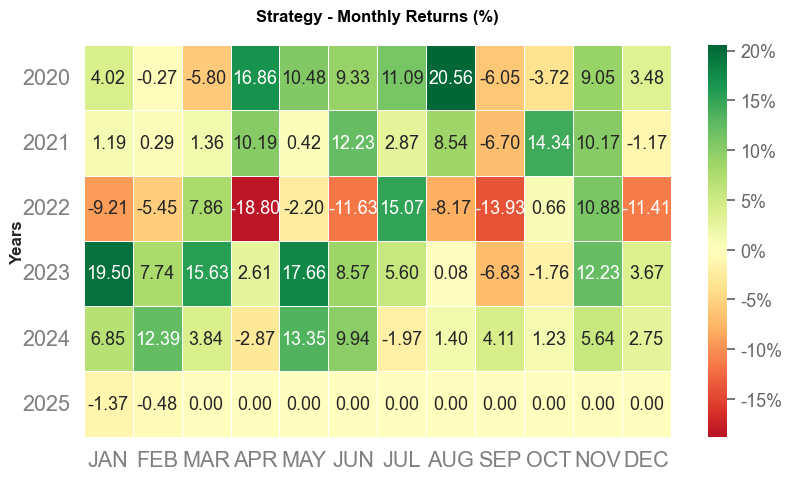

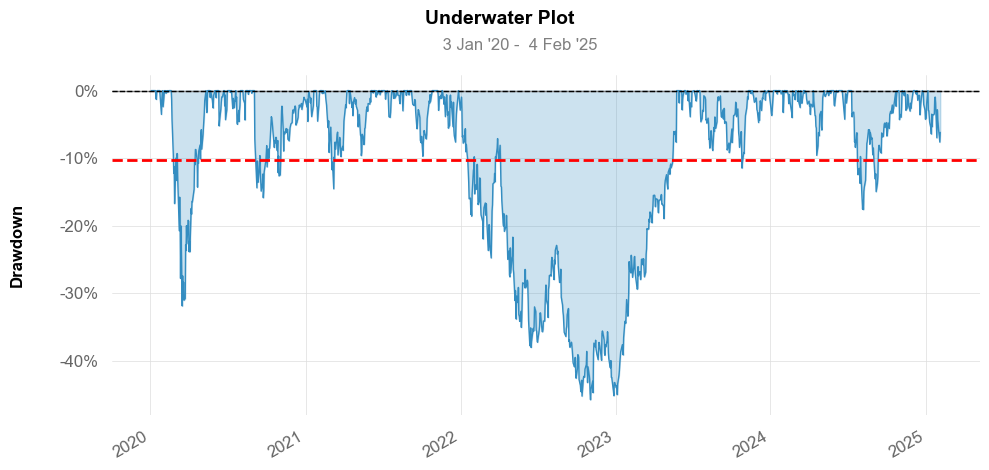

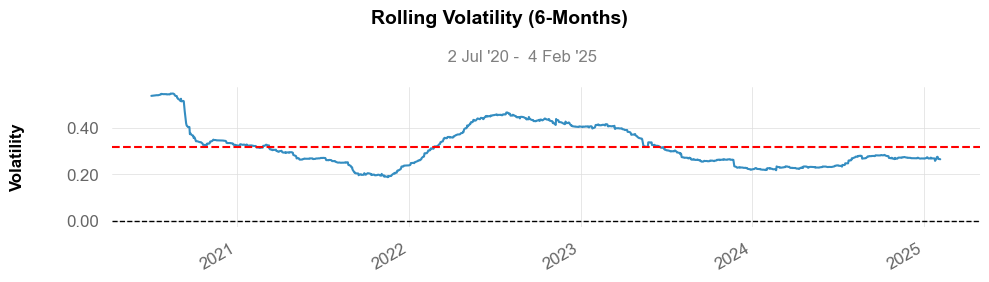

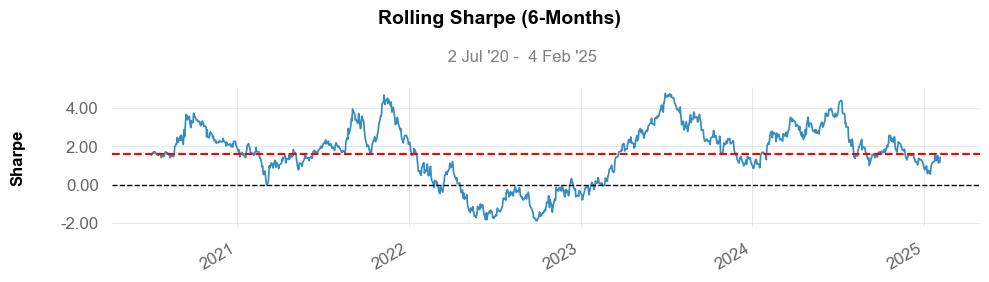

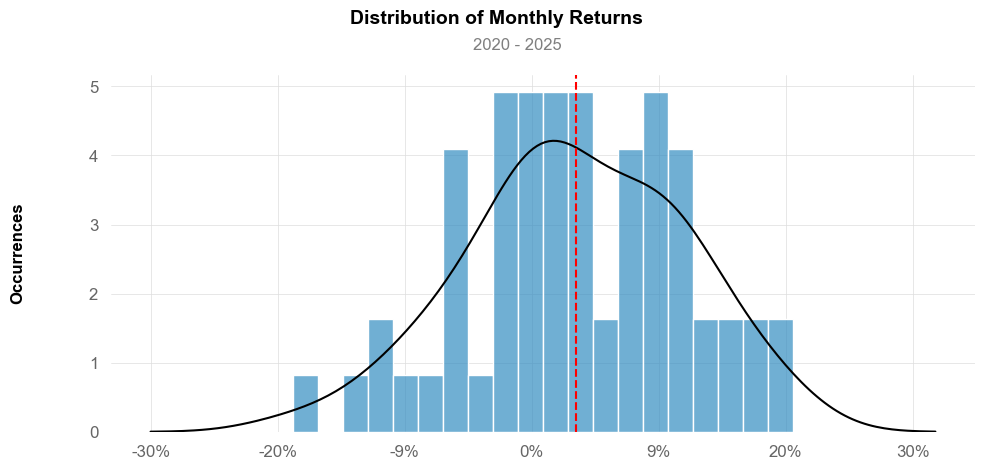

UnsupportedFunctionCall: numpy operations are not valid with resample. Use .resample(...).sum() instead

In [4]:
# Enable quantstats Jupyter mode for better visualizations
qs.extend_pandas()

def fetch_mag7_data(start_date='2020-01-01', end_date='2025-02-04'):
    """Fetch Magnificent 7 stock data using pandas_datareader"""
    tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'TSLA']
    
    df = pd.DataFrame()
    for ticker in tickers:
        try:
            stock_data = pdr.DataReader(ticker, 'stooq', start=start_date, end=end_date)
            df[ticker] = stock_data['Close']
        except Exception as e:
            print(f"Error fetching {ticker}: {e}")
    
    return df.sort_index()

def calculate_equal_weight_returns(prices_df):
    """Calculate equal-weighted portfolio returns"""
    # Calculate returns
    returns = prices_df.pct_change().dropna()
    
    # Equal weights for Magnificent 7
    weights = np.array([0.2, 0.2, 0.1, 0.05, 0.3, 0.1, 0.05])
    
    # Calculate portfolio returns
    portfolio_returns = (returns * weights).sum(axis=1)
    
    return portfolio_returns, returns

def analyze_portfolio(portfolio_returns, benchmark_returns=None):
    """Generate comprehensive portfolio analysis using QuantStats"""
    
    # Basic metrics
    print("\nPortfolio Metrics:")
    print("-----------------")
    print(f"Cumulative Return: {qs.stats.comp(portfolio_returns):.2%}")
    print(f"CAGR: {qs.stats.cagr(portfolio_returns):.2%}")
    print(f"Sharpe Ratio: {qs.stats.sharpe(portfolio_returns):.2f}")
    print(f"Sortino Ratio: {qs.stats.sortino(portfolio_returns):.2f}")
    print(f"Max Drawdown: {qs.stats.max_drawdown(portfolio_returns):.2%}")
    print(f"Value at Risk (95%): {qs.stats.var(portfolio_returns):.2%}")
    print(f"Conditional VaR (95%): {qs.stats.cvar(portfolio_returns):.2%}")
    
    # Risk metrics
    print("\nRisk Metrics:")
    print("-------------")
    print(f"Annual Volatility: {qs.stats.volatility(portfolio_returns):.2%}")
    print(f"Skewness: {qs.stats.skew(portfolio_returns):.2f}")
    print(f"Kurtosis: {qs.stats.kurtosis(portfolio_returns):.2f}")
    print(f"Calmar Ratio: {qs.stats.calmar(portfolio_returns):.2f}")
    print(f"Omega Ratio: {qs.stats.omega(portfolio_returns):.2f}")
    
    # Return metrics
    print("\nReturn Metrics:")
    print("--------------")
    print(f"Best Day: {qs.stats.best(portfolio_returns):.2%}")
    print(f"Worst Day: {qs.stats.worst(portfolio_returns):.2%}")
    print(f"Average Day: {qs.stats.avg_return(portfolio_returns):.2%}")
    print(f"Winning Days: {qs.stats.win_rate(portfolio_returns):.2%}")
    
    return {
        'cagr': qs.stats.cagr(portfolio_returns),
        'sharpe': qs.stats.sharpe(portfolio_returns),
        'sortino': qs.stats.sortino(portfolio_returns),
        'max_drawdown': qs.stats.max_drawdown(portfolio_returns),
        'volatility': qs.stats.volatility(portfolio_returns)
    }

def generate_tearsheet(portfolio_returns, benchmark_returns=None):
    """Generate a complete tearsheet using QuantStats"""
    if benchmark_returns is not None:
        qs.reports.html(portfolio_returns, benchmark_returns, 
                       output='magnificent7_analysis.html',
                       title='Magnificent 7 Equal-Weight Portfolio Analysis')
    else:
        qs.reports.html(portfolio_returns, 
                       output='magnificent7_analysis.html',
                       title='Magnificent 7 Equal-Weight Portfolio Analysis')

def main():
    # Fetch data
    prices_df = fetch_mag7_data()
    
    # Calculate portfolio returns
    portfolio_returns, stock_returns = calculate_equal_weight_returns(prices_df)
    
    # Get SPY as benchmark
    try:
        benchmark = pdr.DataReader('SPY', 'stooq', 
                                 start=prices_df.index[0], 
                                 end=prices_df.index[-1])['Close']
        benchmark_returns = benchmark.pct_change().dropna()
    except Exception as e:
        print(f"Error fetching benchmark: {e}")
        benchmark_returns = None
    
    # Analyze portfolio
    metrics = analyze_portfolio(portfolio_returns)
    
    # Generate plots
    print("\nGenerating Plots...")
    
    # Monthly returns heatmap
    qs.plots.monthly_heatmap(portfolio_returns)
    
    # Drawdown plot
    qs.plots.drawdown(portfolio_returns)
    
    # Rolling metrics
    qs.plots.rolling_volatility(portfolio_returns)
    qs.plots.rolling_sharpe(portfolio_returns)
    
    # Distribution of returns
    qs.plots.histogram(portfolio_returns)
    
    # Generate full tearsheet
    if benchmark_returns is not None:
        generate_tearsheet(portfolio_returns, benchmark_returns)
    else:
        generate_tearsheet(portfolio_returns)
    
    return prices_df, portfolio_returns, metrics

if __name__ == "__main__":
    prices_df, portfolio_returns, metrics = main()


Portfolio Metrics:
-----------------
Cumulative Return: 55.64%
CAGR: 28.76%
Sharpe Ratio: 1.84
Sortino Ratio: 2.78
Max Drawdown: -14.04%
Value at Risk (95%): -2.06%
Conditional VaR (95%): -2.74%

Risk Metrics:
-------------
Annual Volatility: 21.40%
Skewness: -0.13
Kurtosis: 0.96
Calmar Ratio: 2.05
Omega Ratio: 1.35

Return Metrics:
--------------
Best Day: 5.44%
Worst Day: -4.03%
Average Day: 0.16%
Winning Days: 55.15%

Generating Plots...


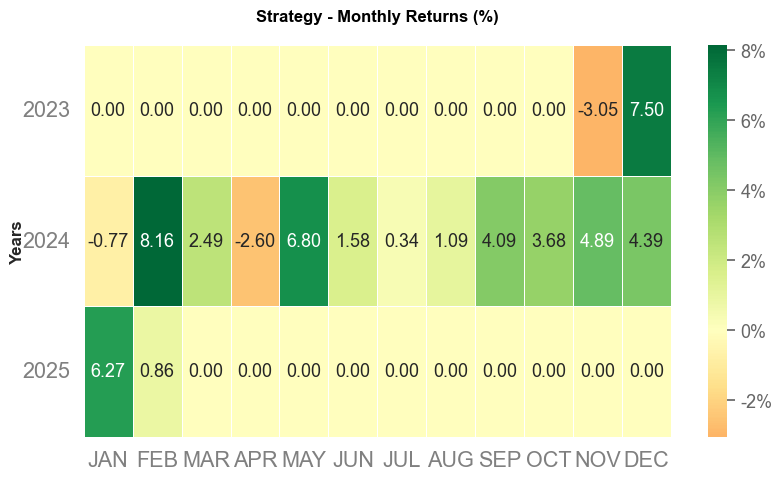

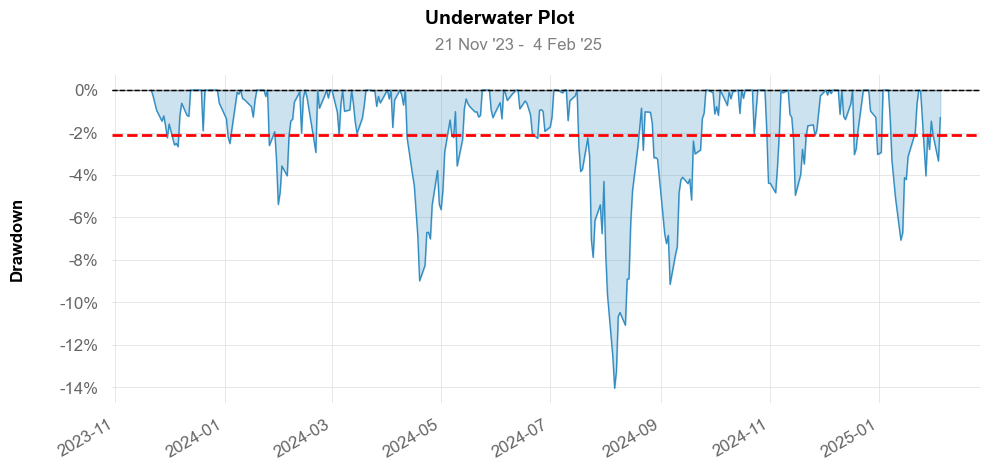

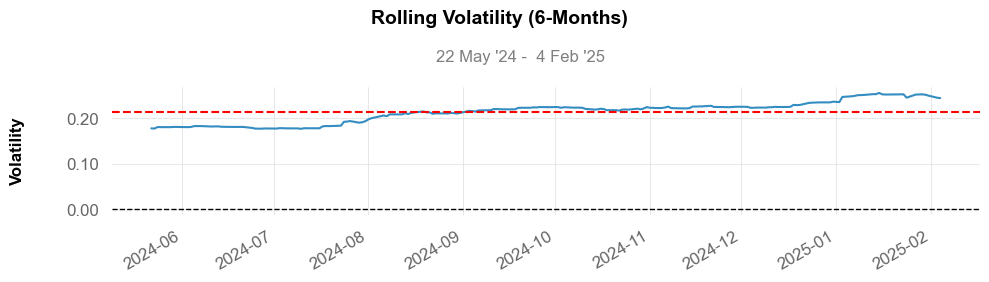

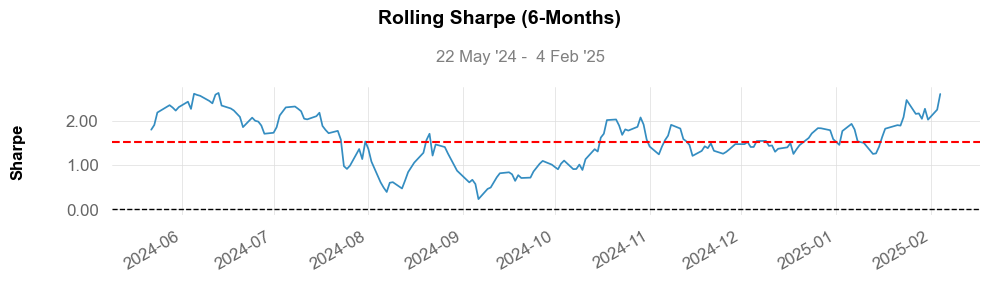

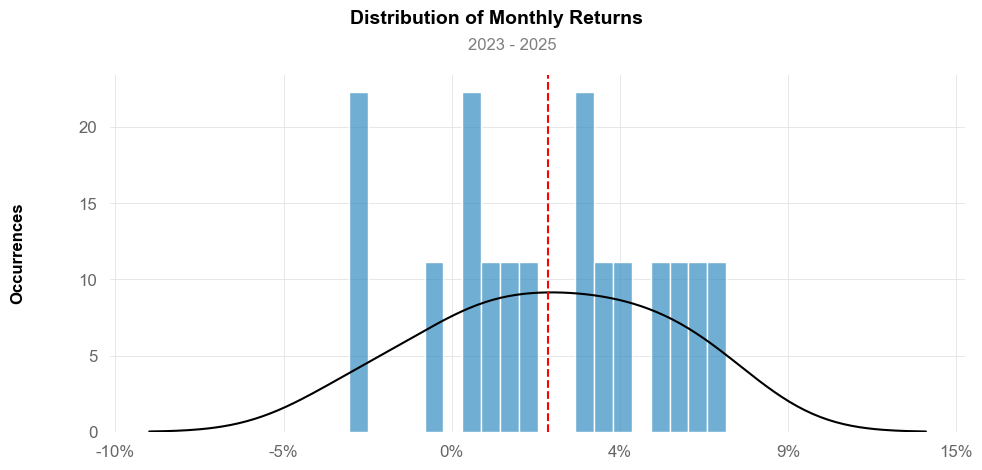

UnsupportedFunctionCall: numpy operations are not valid with resample. Use .resample(...).sum() instead

In [5]:
tickers = [
    'NVDA', 'GOOGL', 'MSFT', 'META', 'AAPL', 'OKLO', 'TSLA', 'RR',
    'AMD', 'XOM', 'LLY', 'V', 'ASML', 'MRNA', 'JPM', 'BYD', 'SQM',
    'RIO', 'VRTX', 'PLTR', 'LAC', 'LAR', 'NIO', 'NVO', 'ARCT', 'INDI'
]

weights = np.array([
    0.1089, 0.0723, 0.0591, 0.0587, 0.0567, 0.0402, 0.0402, 0.0375,
    0.0363, 0.0351, 0.0347, 0.0340, 0.0316, 0.0304, 0.0304, 0.0302, 0.0282,
    0.0259, 0.0252, 0.0236, 0.0216, 0.0205, 0.0184, 0.018, 0.0085, 0.0059
])

def fetch_mag7_data(start_date='2020-01-01', end_date='2025-02-04'):
    """Fetch selected stock data using pandas_datareader"""
    df = pd.DataFrame()
    for ticker in tickers:
        try:
            stock_data = pdr.DataReader(ticker, 'stooq', start=start_date, end=end_date)
            df[ticker] = stock_data['Close']
        except Exception as e:
            print(f"Error fetching {ticker}: {e}")
    
    return df.sort_index()

def calculate_weighted_returns(prices_df):
    """Calculate weighted portfolio returns"""
    # Calculate returns
    returns = prices_df.pct_change().dropna()
    
    # Calculate portfolio returns
    portfolio_returns = (returns * weights).sum(axis=1)
    
    return portfolio_returns, returns

def analyze_portfolio(portfolio_returns, benchmark_returns=None):
    """Generate comprehensive portfolio analysis using QuantStats"""
    
    # Basic metrics
    print("\nPortfolio Metrics:")
    print("-----------------")
    print(f"Cumulative Return: {qs.stats.comp(portfolio_returns):.2%}")
    print(f"CAGR: {qs.stats.cagr(portfolio_returns):.2%}")
    print(f"Sharpe Ratio: {qs.stats.sharpe(portfolio_returns):.2f}")
    print(f"Sortino Ratio: {qs.stats.sortino(portfolio_returns):.2f}")
    print(f"Max Drawdown: {qs.stats.max_drawdown(portfolio_returns):.2%}")
    print(f"Value at Risk (95%): {qs.stats.var(portfolio_returns):.2%}")
    print(f"Conditional VaR (95%): {qs.stats.cvar(portfolio_returns):.2%}")
    
    # Risk metrics
    print("\nRisk Metrics:")
    print("-------------")
    print(f"Annual Volatility: {qs.stats.volatility(portfolio_returns):.2%}")
    print(f"Skewness: {qs.stats.skew(portfolio_returns):.2f}")
    print(f"Kurtosis: {qs.stats.kurtosis(portfolio_returns):.2f}")
    print(f"Calmar Ratio: {qs.stats.calmar(portfolio_returns):.2f}")
    print(f"Omega Ratio: {qs.stats.omega(portfolio_returns):.2f}")
    
    # Return metrics
    print("\nReturn Metrics:")
    print("--------------")
    print(f"Best Day: {qs.stats.best(portfolio_returns):.2%}")
    print(f"Worst Day: {qs.stats.worst(portfolio_returns):.2%}")
    print(f"Average Day: {qs.stats.avg_return(portfolio_returns):.2%}")
    print(f"Winning Days: {qs.stats.win_rate(portfolio_returns):.2%}")
    
    return {
        'cagr': qs.stats.cagr(portfolio_returns),
        'sharpe': qs.stats.sharpe(portfolio_returns),
        'sortino': qs.stats.sortino(portfolio_returns),
        'max_drawdown': qs.stats.max_drawdown(portfolio_returns),
        'volatility': qs.stats.volatility(portfolio_returns)
    }

def generate_tearsheet(portfolio_returns, benchmark_returns=None):
    """Generate a complete tearsheet using QuantStats"""
    if benchmark_returns is not None:
        qs.reports.html(portfolio_returns, benchmark_returns, 
                       output='magnificent7_analysis.html',
                       title='Magnificent 7 Weighted Portfolio Analysis')
    else:
        qs.reports.html(portfolio_returns, 
                       output='magnificent7_analysis.html',
                       title='Magnificent 7 Weighted Portfolio Analysis')

def main():
    # Fetch data
    prices_df = fetch_mag7_data()
    
    # Calculate portfolio returns
    portfolio_returns, stock_returns = calculate_weighted_returns(prices_df)
    
    # Get SPY as benchmark
    try:
        benchmark = pdr.DataReader('SPY', 'stooq', 
                                 start=prices_df.index[0], 
                                 end=prices_df.index[-1])['Close']
        benchmark_returns = benchmark.pct_change().dropna()
    except Exception as e:
        print(f"Error fetching benchmark: {e}")
        benchmark_returns = None
    
    # Analyze portfolio
    metrics = analyze_portfolio(portfolio_returns)
    
    # Generate plots
    print("\nGenerating Plots...")
    
    # Monthly returns heatmap
    qs.plots.monthly_heatmap(portfolio_returns)
    
    # Drawdown plot
    qs.plots.drawdown(portfolio_returns)
    
    # Rolling metrics
    qs.plots.rolling_volatility(portfolio_returns)
    qs.plots.rolling_sharpe(portfolio_returns)
    
    # Distribution of returns
    qs.plots.histogram(portfolio_returns)
    
    # Generate full tearsheet
    if benchmark_returns is not None:
        generate_tearsheet(portfolio_returns, benchmark_returns)
    else:
        generate_tearsheet(portfolio_returns)
    
    return prices_df, portfolio_returns, metrics

if __name__ == "__main__":
    prices_df, portfolio_returns, metrics = main()


In [6]:
portfolio = {f"{ticker}.US": weight for ticker, weight in zip(tickers, weights)}

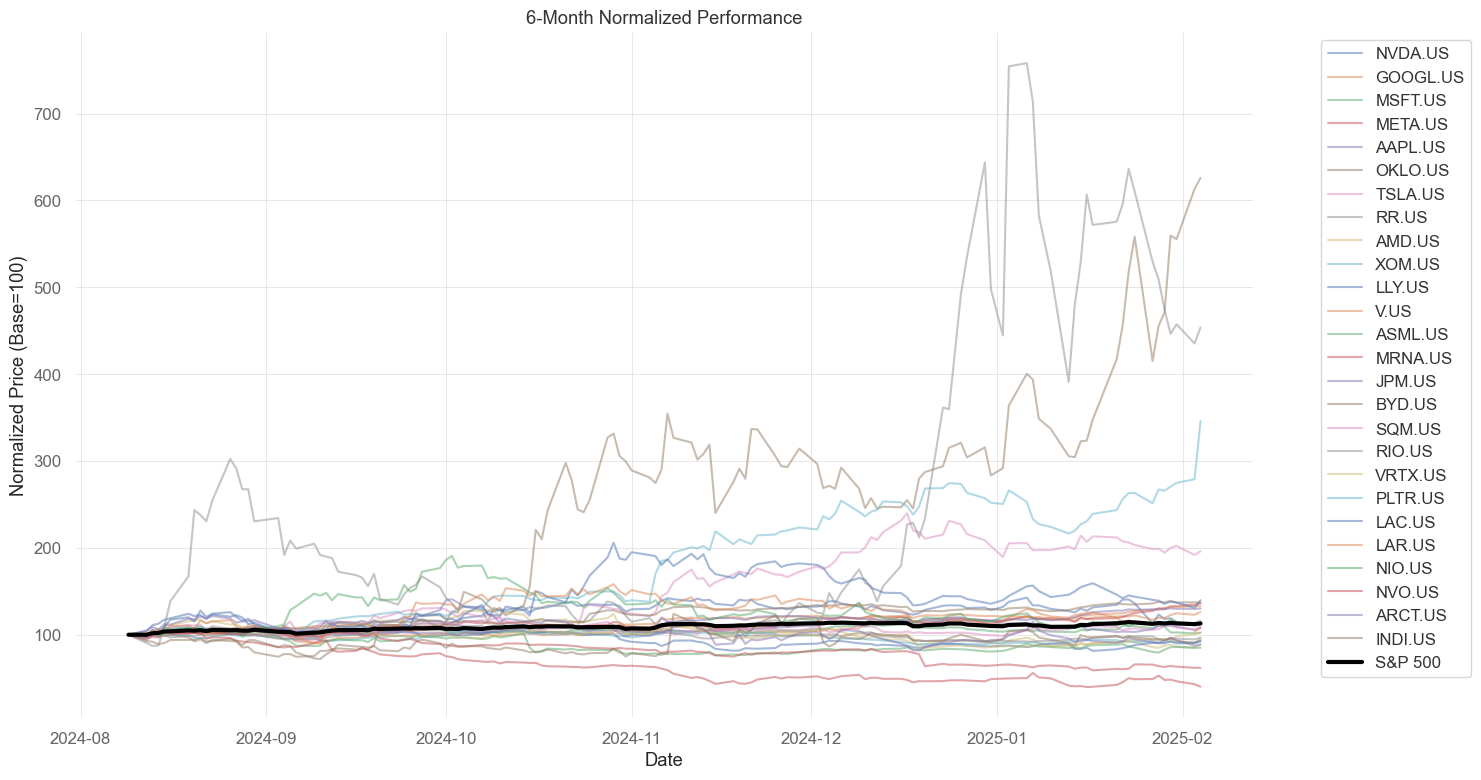

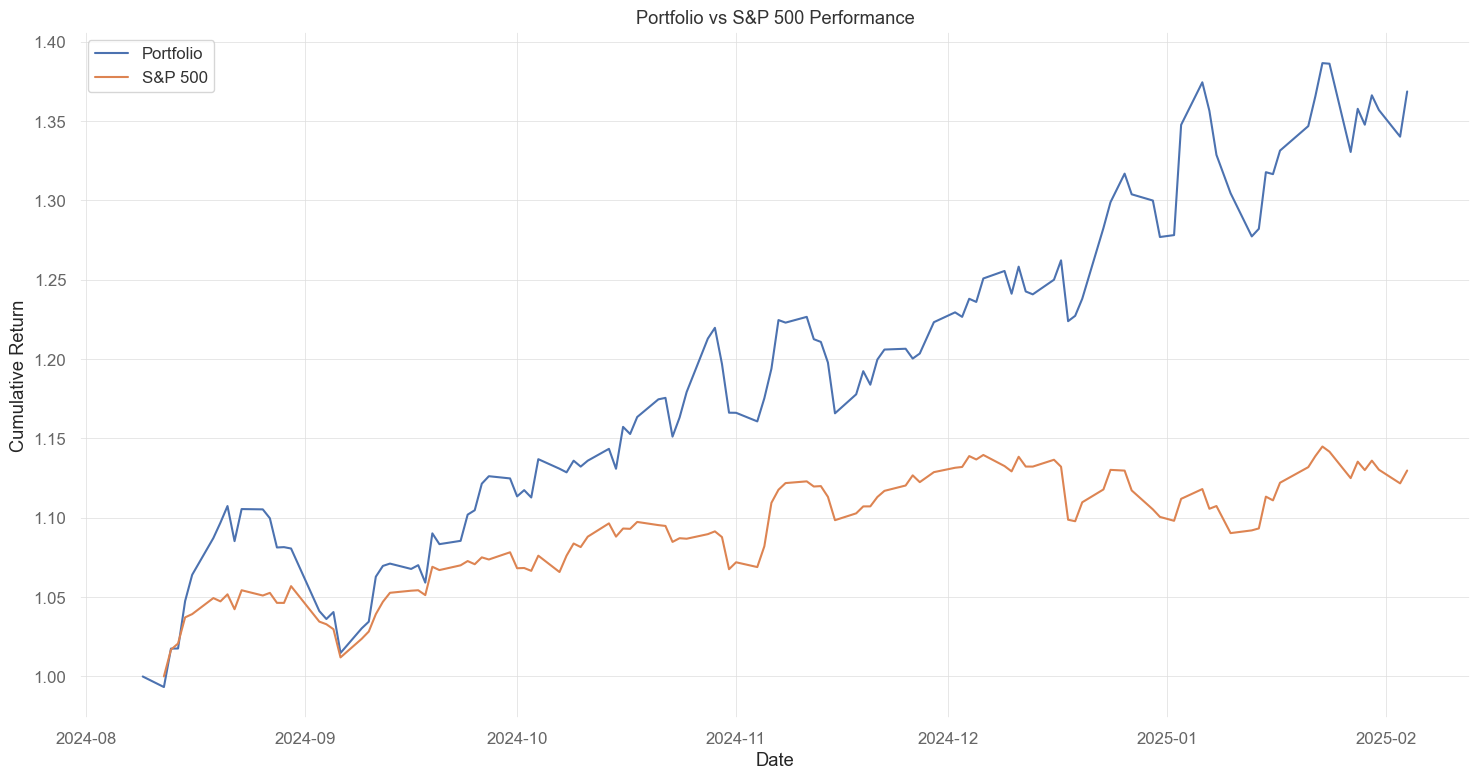

<Figure size 1500x800 with 0 Axes>

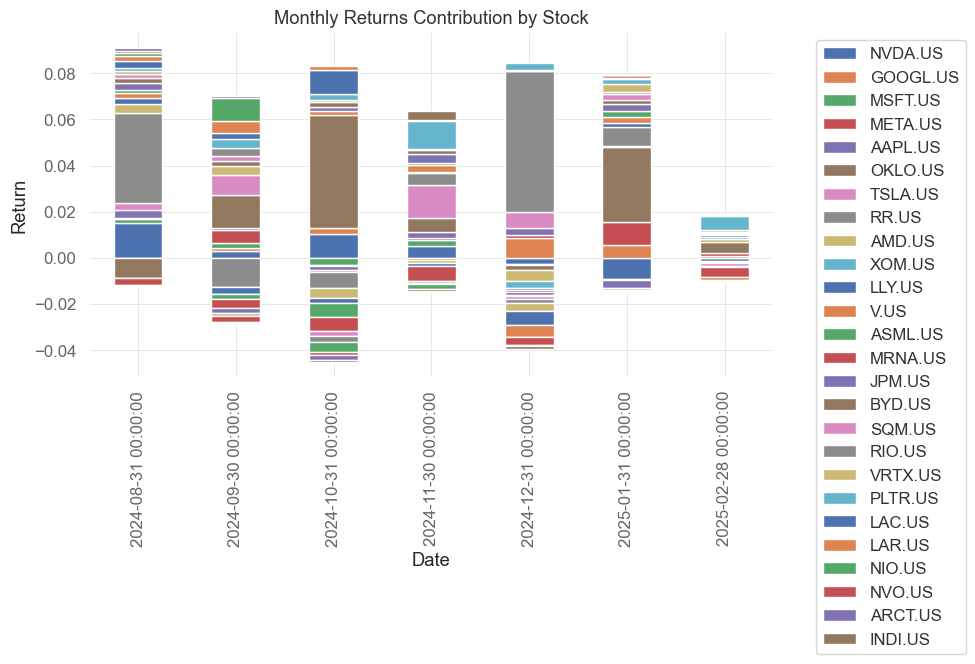

In [7]:
def get_portfolio_performance():
    # Set date range
    end_date = datetime.now()
    start_date = end_date - timedelta(days=180)
    
    # Initialize DataFrame for stock prices
    all_data = pd.DataFrame()
    
    # Download data for S&P 500 as benchmark
    try:
        spy = web.DataReader('^SPX', 'stooq', start_date, end_date)['Close']
        spy = spy.sort_index()  # Stooq returns data in reverse order
    except Exception as e:
        print(f"Error downloading S&P 500 data: {e}")
        return None
    
    # Download data for each stock with rate limiting
    for ticker in portfolio.keys():
        try:
            print(f"Downloading data for {ticker}")
            stock_data = web.DataReader(ticker, 'stooq', start_date, end_date)['Close']
            stock_data = stock_data.sort_index()
            all_data[ticker] = stock_data
            time.sleep(1)  # Rate limiting
        except Exception as e:
            print(f"Error downloading data for {ticker}: {e}")
    
    # Calculate daily returns
    daily_returns = all_data.pct_change()
    
    # Calculate portfolio returns
    portfolio_returns = pd.DataFrame()
    for ticker in portfolio.keys():
        if ticker in daily_returns.columns:
            portfolio_returns[ticker] = daily_returns[ticker] * portfolio[ticker]
    
    portfolio_total_returns = portfolio_returns.sum(axis=1)
    
    # Normalize prices for comparison
    normalized_prices = all_data / all_data.iloc[0] * 100
    normalized_spy = spy / spy.iloc[0] * 100
    
    # Calculate monthly returns with contribution
    monthly_returns = portfolio_returns.resample('M').sum()
    
    return normalized_prices, normalized_spy, monthly_returns, portfolio_total_returns

def plot_normalized_performance(normalized_prices, normalized_spy):
    plt.figure(figsize=(15, 8))
    for col in normalized_prices.columns:
        plt.plot(normalized_prices.index, normalized_prices[col], label=col, alpha=0.5)
    plt.plot(normalized_spy.index, normalized_spy, label='S&P 500', linewidth=3, color='black')
    plt.title('6-Month Normalized Performance')
    plt.xlabel('Date')
    plt.ylabel('Normalized Price (Base=100)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

def plot_portfolio_vs_benchmark(portfolio_total_returns, spy_returns):
    plt.figure(figsize=(15, 8))
    cumulative_portfolio = (1 + portfolio_total_returns).cumprod()
    cumulative_spy = (1 + spy_returns.pct_change()).cumprod()
    
    plt.plot(cumulative_portfolio.index, cumulative_portfolio, label='Portfolio')
    plt.plot(cumulative_spy.index, cumulative_spy, label='S&P 500')
    plt.title('Portfolio vs S&P 500 Performance')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_monthly_contributions(monthly_returns):
    plt.figure(figsize=(15, 8))
    monthly_returns.plot(kind='bar', stacked=True)
    plt.title('Monthly Returns Contribution by Stock')
    plt.xlabel('Date')
    plt.ylabel('Return')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Run the analysis
if __name__ == "__main__":
    results = get_portfolio_performance()
    if results is not None:
        normalized_prices, normalized_spy, monthly_returns, portfolio_total_returns = results
        plot_normalized_performance(normalized_prices, normalized_spy)
        plot_portfolio_vs_benchmark(portfolio_total_returns, normalized_spy)
        plot_monthly_contributions(monthly_returns)

In [8]:
def plot_normalized_performance(normalized_prices, normalized_spy):
    fig = go.Figure()

    # Add stocks
    for col in normalized_prices.columns:
        fig.add_trace(go.Scatter(
            x=normalized_prices.index,
            y=normalized_prices[col],
            mode='lines',
            name=col,
            opacity=0.5
        ))

    # Add S&P 500
    fig.add_trace(go.Scatter(
        x=normalized_spy.index,
        y=normalized_spy,
        mode='lines',
        name='S&P 500',
        line=dict(width=3, color='black')
    ))

    fig.update_layout(
        title="6-Month Normalized Performance",
        xaxis_title="Date",
        yaxis_title="Normalized Price (Base=100)",
        legend_title="Assets",
        template="plotly_white"
    )

    fig.show()


def plot_portfolio_vs_benchmark(portfolio_total_returns, spy_returns):
    cumulative_portfolio = (1 + portfolio_total_returns).cumprod()
    cumulative_spy = (1 + spy_returns.pct_change()).cumprod()

    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=cumulative_portfolio.index,
        y=cumulative_portfolio,
        mode='lines',
        name='Portfolio',
        line=dict(color='blue')
    ))

    fig.add_trace(go.Scatter(
        x=cumulative_spy.index,
        y=cumulative_spy,
        mode='lines',
        name='S&P 500',
        line=dict(color='red')
    ))

    fig.update_layout(
        title="Portfolio vs S&P 500 Performance",
        xaxis_title="Date",
        yaxis_title="Cumulative Return",
        template="plotly_white"
    )

    fig.show()


def plot_monthly_contributions(monthly_returns):
    fig = px.bar(
        monthly_returns,
        x=monthly_returns.index,
        y=monthly_returns.columns,
        title="Monthly Returns Contribution by Stock",
        labels={"value": "Return", "index": "Date"},
        barmode='stack'
    )

    fig.update_layout(template="plotly_white")
    fig.show()


# Run the analysis
if __name__ == "__main__":
    if results is not None:
        normalized_prices, normalized_spy, monthly_returns, portfolio_total_returns = results
        plot_normalized_performance(normalized_prices, normalized_spy)
        plot_portfolio_vs_benchmark(portfolio_total_returns, normalized_spy)
        plot_monthly_contributions(monthly_returns)